# Example 12-4: ODE with non-constant coefficients

Here's another example of Dirichlet boundary conditions, this time for an ODE with non-constant coefficients.

## Summary of commands

No new commands are demonstrated in this exercise, as it will closely mirror [Example 12-1](12-1_dirichlet_demo).

## Example

The following ODE is solved using the direct method with 31 equally spaced points $(N = 31)$ over the interval $x = [x_L, x_R] = [0, 2]$.

$$ (x - 1) y'' - x y' + y = -(1 - x)^2 $$

The Dirichlet boundary conditions are

$$ y(x_L) = y_L = 0 \quad  \text{and} \quad y(x_R) = y_R = -0.25 $$

The associated coefficients are: 

$$ \begin{align}
a_j &= (1 + 0.5 h) x_j - 1 \\
b_j &= h^2 - 2(x_j - 1) \\
c_j &= (1 - 0.5 h) x_j - 1
\end{align} $$

and

$$ \begin{align}
f_2 &= -h^2 \left( 1 - x_2 \right)^2 - \left[ \left( 1 + 0.5 h \right) x_2 - 1 \right] y_L \\
f_j &= -h^2 \left( 1 - x_j \right)^2 \\
f_{N-1} &= -h^2 \left( 1 - x_{N-1} \right)^2 - \left[ \left( 1 - 0.5 h \right) x_{N-1} - 1 \right] y_R
\end{align} $$

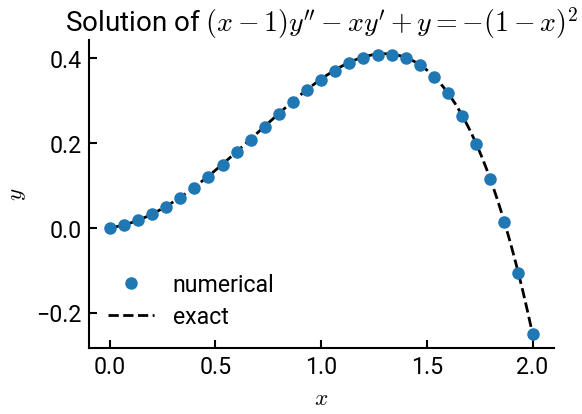

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# helper function to make tridiagonal matrices
def make_tridiag(a, b, c):
    """ For convenience, a, b, c should all be the same length.
        The function will automatically subset and place on the 
        corresponding diagonal. """
    return np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)

# constants
N = 31
yL =  0.0
yR = -0.25
xL = 0
xR = 2
h = (xR - xL) / (N - 1)
x = np.linspace(xL, xR, N)

# construct matrix - note the indices on x !
a = (1 + 0.5 * h) * x[1:-1] - 1
b = h**2 - 2 * (x[1:-1] - 1)
c = (1 - 0.5 * h) * x[1:-1] - 1
A = make_tridiag(a, b, c)

# construct f and solve
f = -h**2 * (1 - x[1:-1])**2
f[0] -= ((1 + 0.5 * h) * x[1] - 1) * yL
f[-1] -= ((1 - 0.5 * h) * x[-2] - 1) * yR
y = np.linalg.solve(A, f)
y = np.concatenate([[yL], y, [yR]])

# exact solution
x1 = np.linspace(xL, xR, 10000)
y_exact = 1.0695 * x1 - np.exp(x1) + x1 ** 2 + 1

# plot the result
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='numerical')
ax.plot(x1, y_exact, 'k--', lw=2, label='exact', zorder=-5)
ax.set(xlabel='$x$', ylabel='$y$', title="Solution of $(x-1)y'' - xy' + y = -(1 - x)^2$")
ax.legend()
plt.show()